## Introduction 
Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Content:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

## Objective 
1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using a classification model
4. Model evaluation

# Exploratory Analysis

Importing Libraries 

In [74]:
import warnings 
import itertools
import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,1.0,1.0,1.0,2.0,2.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
df.shape

(5000, 14)

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Dealing with Missing values

In [8]:
df.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [17]:
df.drop(['ID'], axis = 1, inplace = True)

In [18]:
df.drop(['ZIP Code'], axis = 1, inplace = True)

# Data Preparation 

In [19]:
# Dividing the columns in the dataset in to numeric and categorical attributes.
cols = set(df.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['CreditCard',
 'CD Account',
 'Securities Account',
 'Personal Loan',
 'Family',
 'Education',
 'Online']

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


# Visualizations

* 'Age' and 'Experience' are correlated.

* 'Income' and ‘CCAvg' are correlated.
 
* 'CD Account' has a correlation with 'Credit Card', 'Securities Account', 'Online', ‘CCAvg' and 'Income'.
 
* 'Personal Loan' has correlation with 'Income’, 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
 
* 'Mortgage' has moderate correlation with 'Income'
 
* 'Income' influences ‘CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'

<function matplotlib.pyplot.show(close=None, block=None)>

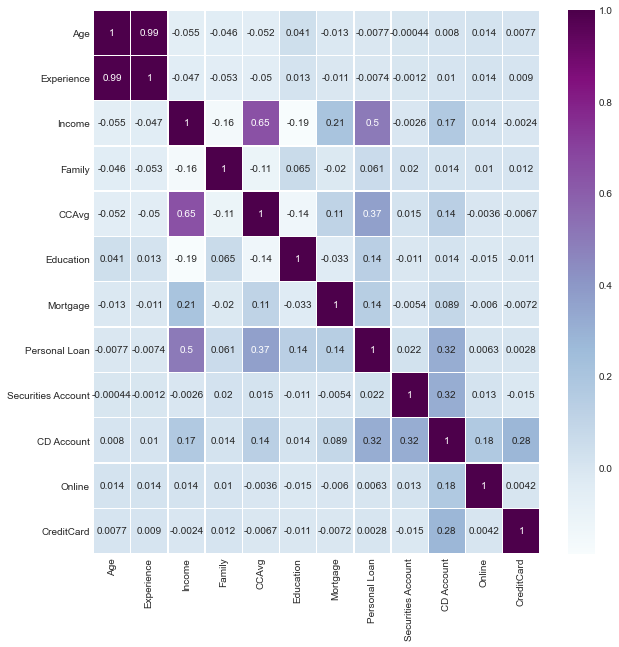

In [40]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

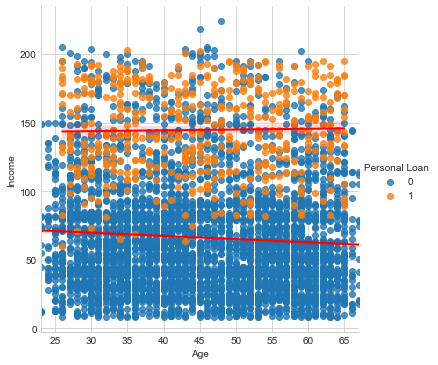

In [49]:
sns.lmplot(x="Age", y="Income", data=df,hue='Personal Loan',line_kws={"lw":2 ,'color': 'red'},height=5);

The clients that earn more than 100K are likely to get a loan from the bank. 

<AxesSubplot:xlabel='Age', ylabel='CCAvg'>

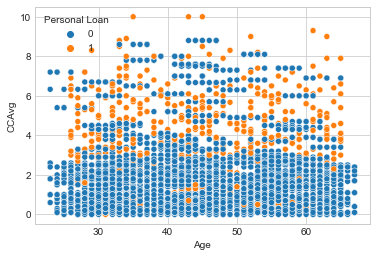

In [51]:
sns.scatterplot(x = 'Age', y = 'CCAvg', data = df, hue = 'Personal Loan')

<AxesSubplot:xlabel='Experience', ylabel='count'>

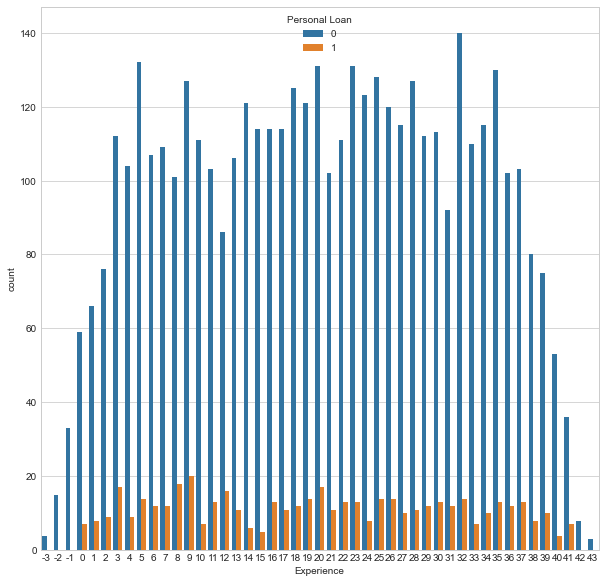

In [56]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x='Experience', hue = 'Personal Loan', data = df)

<AxesSubplot:>

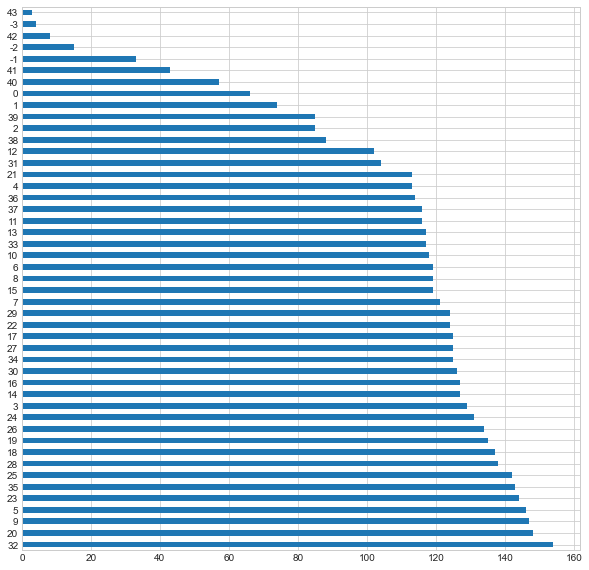

In [54]:
fig, ax = plt.subplots(figsize = (10, 10))
df.Experience.value_counts().plot.barh()

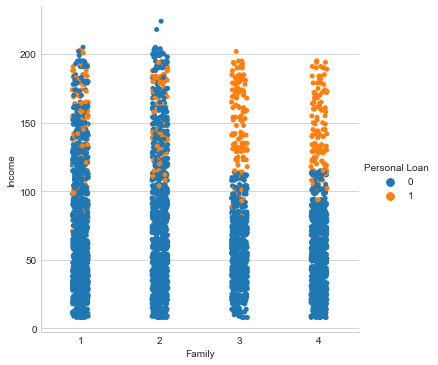

In [65]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='strip')

From the above columns, that income and family are standalone attributes, which don't affect the personal loan while family members with more income especially above 100k are more likely to get the loan.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

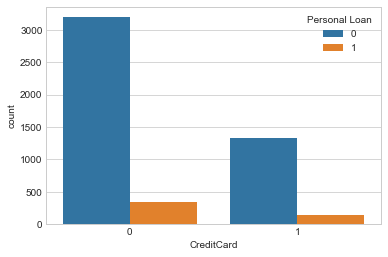

In [66]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = df)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

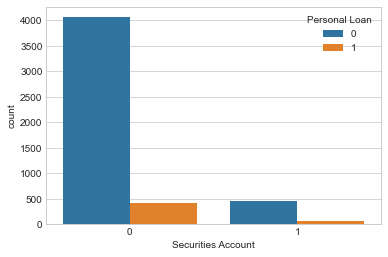

In [67]:
sns.countplot(x='Securities Account', hue = 'Personal Loan', data = df)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

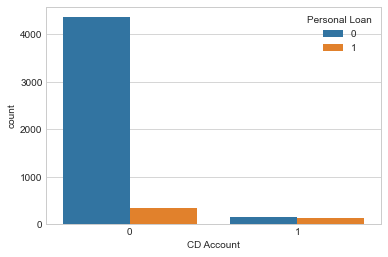

In [68]:
sns.countplot(x='CD Account', hue = 'Personal Loan', data = df)

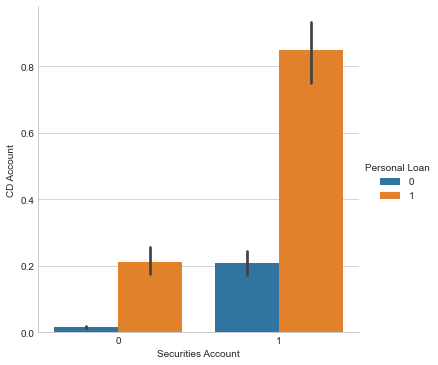

In [69]:
sns.catplot(x='Securities Account', y = 'CD Account', data = df, kind = 'bar', hue = 'Personal Loan')

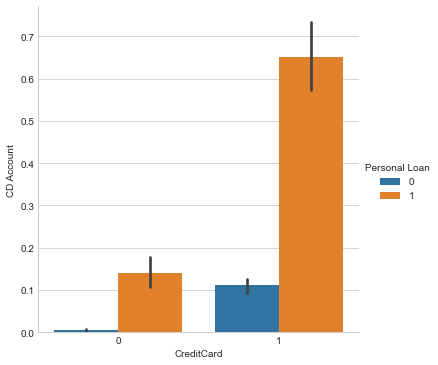

In [70]:
sns.catplot(x='CreditCard', y = 'CD Account', data = df, kind = 'bar', hue = 'Personal Loan' )

# Data Preprocessing 

In [71]:
X = df.drop('Personal Loan', axis = 1).values
y = df['Personal Loan'].values.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Logistic Regression 

In [72]:
logistic_model=LogisticRegression(solver='liblinear')

In [75]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

95.19999999999999
94.53333333333333
[[1333   18]
 [  64   85]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



KNN- K Neighbors Nearest 

In [76]:
k_class = KNeighborsClassifier (n_neighbors=5)

In [77]:
k_class.fit(X_train,y_train)
y_pred = k_class.predict(X_test)
print(k_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

93.60000000000001
90.73333333333333
[[1306   45]
 [  94   55]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.55      0.37      0.44       149

    accuracy                           0.91      1500
   macro avg       0.74      0.67      0.70      1500
weighted avg       0.89      0.91      0.90      1500



Decision Tree Classifier 

In [78]:
tree_class = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best', random_state=33)

In [79]:
tree_class.fit(X_train, y_train)
y_pred = tree_class.predict(X_test)
print(tree_class.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

98.85714285714286
98.13333333333333
[[1343    8]
 [  20  129]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.94      0.87      0.90       149

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

